# Computing the alpha-core filtration for a fixed $k$

In this notebook, we show how to compute the persistent homology of the alpha-core filtration when $k$ is fixed.

In [1]:
import math
import gudhi
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from miniball import Miniball
from scipy.spatial import KDTree

from datasets import sample_circle, sample_rectangle

import warnings
warnings.filterwarnings('ignore')

In [2]:
rng = np.random.default_rng(seed=0)

We define a function to build the alpha-core filtration for a fixed $k$ by modifying the filtration values of GUDHI's implementation of the $\alpha$-complex:

In [3]:
def alpha_core(points, k): 
    kd_tree = KDTree(points)
    k_core_distances, _ = kd_tree.query(points, k=k)
    if k > 1:
        k_core_distances = k_core_distances[:, -1]
    st_alpha = gudhi.AlphaComplex(points=points).create_simplex_tree()
    for face, val in st_alpha.get_filtration():
        max_core = max(k_core_distances[list(face)]) 
        st_alpha.assign_filtration(face, max(val ** 0.5, max_core))
    return st_alpha

We sample points from a circle and combine this with uniform noise to create our noisy input point cloud:

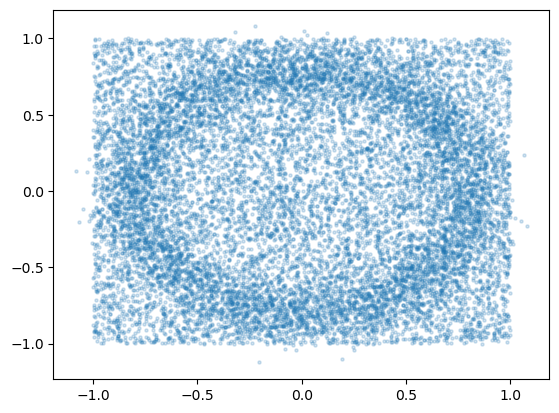

In [4]:
N = 5_000
M = 10_000
Z = sample_circle(N, rng, r=0.8, variance=0.01)
Y = sample_rectangle(M, rng)
X = np.r_[Z, Y]
plt.scatter(*X.T, s=5, alpha=0.2)
plt.show()

Now, we compute the alpha-core filtration for different values of $k$ and plot the corresponding persistence diagrams:

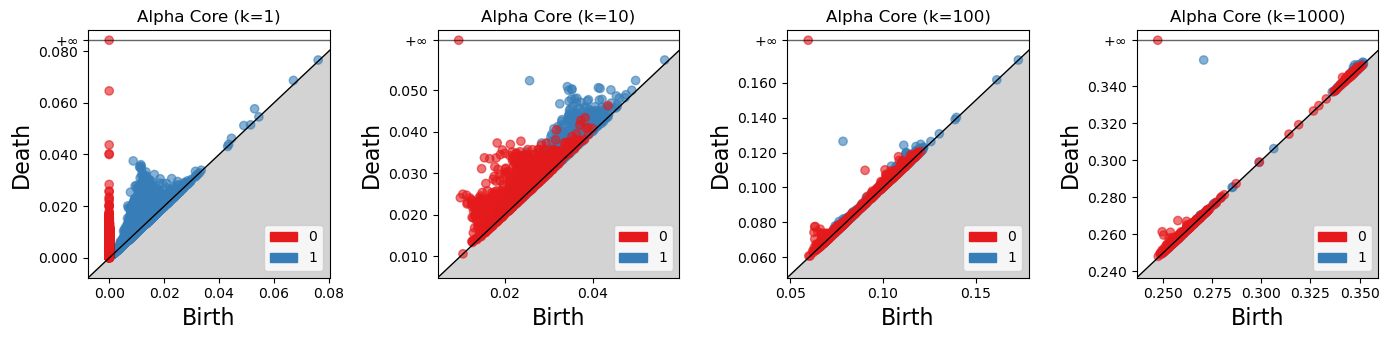

In [5]:
ks = [1, 10, 100, 1000]

fig, axs = plt.subplots(ncols=len(ks), figsize=(14, 14 / len(ks)))
for i, k in enumerate(ks):
    st_alpha_core = alpha_core(points=X, k=k)
    gudhi.plot_persistence_diagram(st_alpha_core.persistence(), axes=axs[i])
    axs[i].set_title(f"Alpha Core (k={k})")
fig.tight_layout()
plt.show()